# Data Interpretation
Plot and try to make some intelligent interpretation about the data.

In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

In [2]:
users = 10000
movies = 1000

In [3]:
# Read in data
data = pd.read_csv('input/data_train.csv', header=0)

In [4]:
# Number of ratings
ratings = len(data)
ratings

1176952

In [5]:
# Percentage of known ratings
ratings/(10000*1000)

0.1176952

In [6]:
# Put it into a matrix A
A = np.zeros((users,movies))

for r in range(data.shape[0]):
    position = data.iloc[r,0]
    # parse
    i = int(re.search('r[0-9]*_',position).group(0)[1:-1])-1
    j = int(re.search('c[0-9]*',position).group(0)[1:])-1
    A[i,j] = data.iloc[r,1]

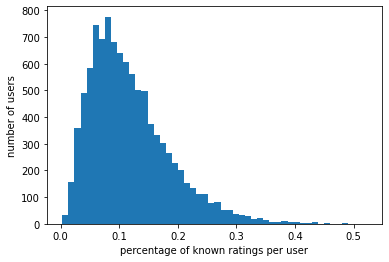

In [7]:
# Percentage of known ratings per user
known_ratio_per_user = np.zeros((users, 1))

for i in range(users):
    known = np.count_nonzero(A[i,:])
    known_ratio_per_user[i,0] = known/movies

figure = plt.figure()
plt.hist(known_ratio_per_user.T[0], bins=50)
plt.xlabel('percentage of known ratings per user')
plt.ylabel('number of users')
#figure.savefig('percentage_of_known_ratings_user.jpg')

In [8]:
# Average number of ratings per user
np.mean(known_ratio_per_user)*movies

117.6952

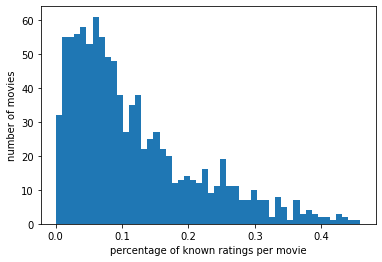

In [9]:
# Number of known ratings per movie
movie_ratings = np.zeros((movies,1))
for i in range(movies):
    movie_ratings[i] = np.count_nonzero(A[:,i])/users

figure = plt.figure()
plt.hist(movie_ratings.T[0], bins=50)
plt.xlabel('percentage of known ratings per movie')
plt.ylabel('number of movies')
#figure.savefig('percentage_of_known_ratings_movie.jpg')

In [10]:
# Average number of ratings per movie
np.mean(movie_ratings)*users

1176.952

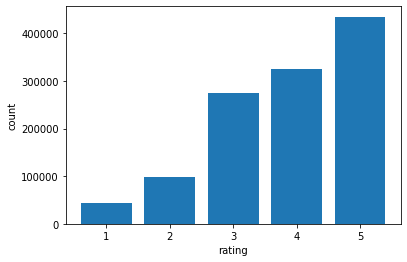

In [11]:
# Compare frequency of ratings
rating_frequency = np.zeros(5)
for i in range(5):
    rating_frequency[i] = np.count_nonzero(A==i+1)
x = np.arange(start=1, stop=6)
fig, ax = plt.subplots()
plt.bar(x,rating_frequency)
plt.xlabel('rating')
plt.ylabel('count')
#fig.savefig('rating_distribution.jpg')

In [12]:
rating_freq_percentage = rating_frequency/np.sum(rating_frequency)
rating_freq_percentage

array([0.03696667, 0.08426852, 0.23308257, 0.27588211, 0.36980013])